For some reason, matplotlib inline doesn't show figures on my jupyter-lab. This also applies to pandas independent plots. So I will migrate to google colab for this activity

# Procedures

Getting started with matplotlib

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

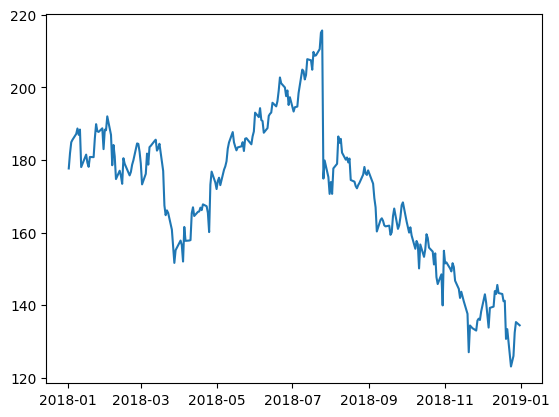

In [ ]:
# Plotting lines

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

plt.plot(fb.index, fb.open)
plt.show()

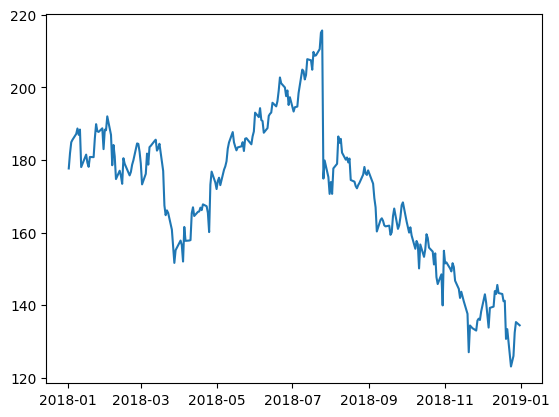

In [ ]:
# Since we are working in a Jupyter notebook,
# we can use the magic command %matplotlib inline once and not have to call plt.show() for each plot

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

plt.plot(fb.index, fb.open)

In [ ]:
# Scatter Plots

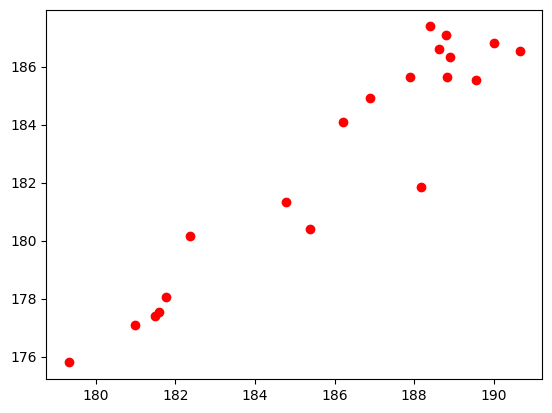

In [ ]:
# We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'.
# For example, we can make a black dashed line with 'k--' or a red scatter plot with 'ro'

plt.plot('high', 'low', 'ro', data=fb.head(20))

In [ ]:
# Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

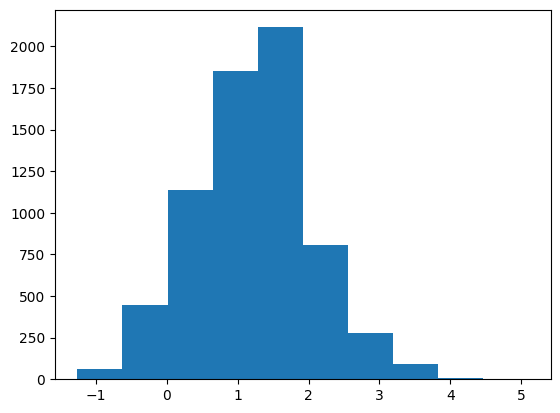

In [ ]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

In [ ]:
# Bin Size matters

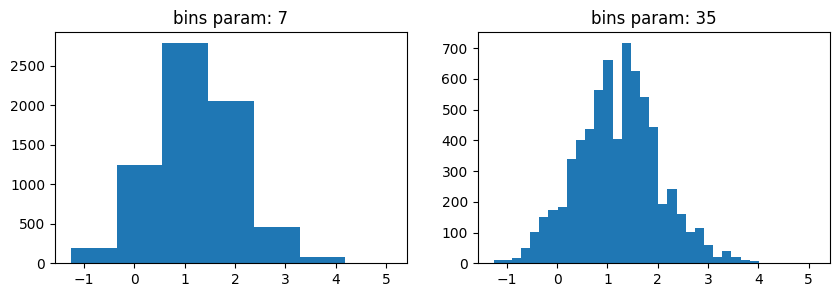

In [ ]:
# Notice how our assumptions of the distribution of the data can change based on the number of bins
# (look at the drop between the two highest peaks on the righthand plot)

x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

Plot components

In [ ]:
# Figure

In [ ]:
# Top-level object that holds the other plot components

fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Axes - Individual plots contained within the Figure

In [ ]:
# Creating subplots

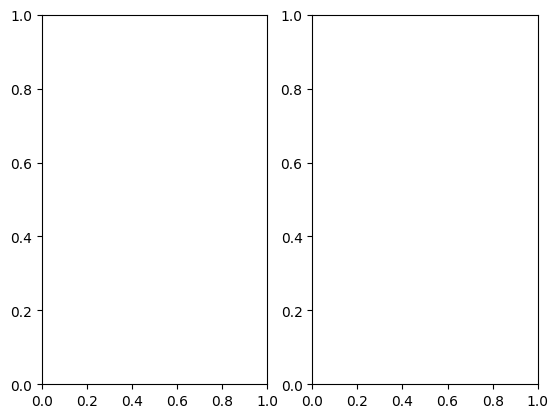

In [ ]:
# Simply specify the number of rows and columns to create

fig, axes = plt.subplots(1, 2)

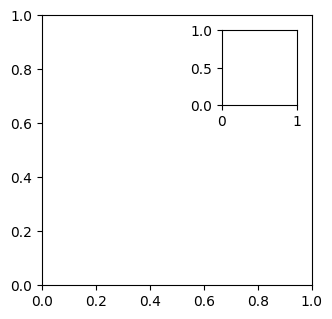

In [ ]:
# As an alternative to using plt.subplots() we can add the Axes to the Figure on our own.
# This allows for some more complex layouts, such as picture in picture

fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

In [ ]:
# Creating Plot Layouts with gridspec

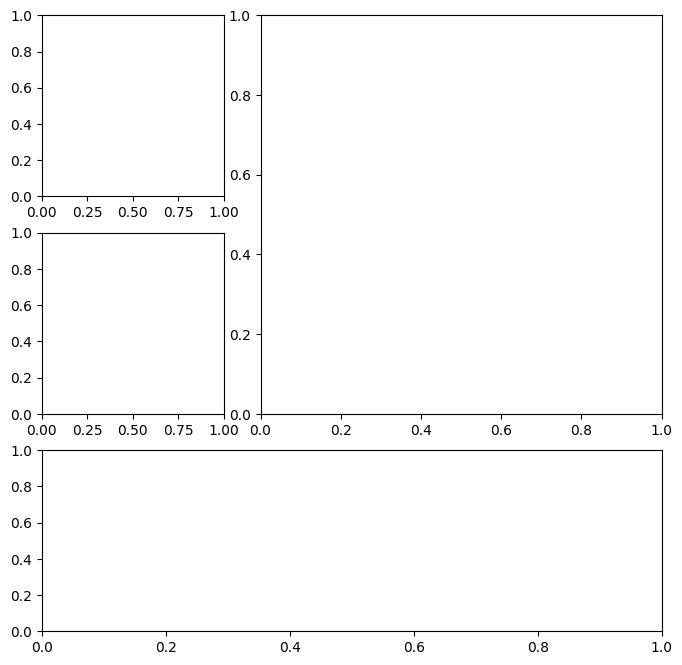

In [ ]:
# We can create subplots with varying sizes
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

In [ ]:
# Saving plots

In [ ]:
# Use plt.savefig() to save the last created plot.
# To save a specific Figure object, use its savefig() method

fig.savefig('empty.png')

Cleaning Up

In [ ]:
# It's important to close resources when we are done with them.
# We use plt.close() to do so. If we pass in nothing, it will close the last plot,
# but we can pass the specific Figure to close or say 'all' to close all Figure objects that are open.
# Let's close all the Figure objects that are open with plt.close()

plt.close('all')

Additional plotting options

In [ ]:
# Specifying figure size

In [ ]:
# Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height):

fig = plt.figure(figsize=(10, 4))
fig

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

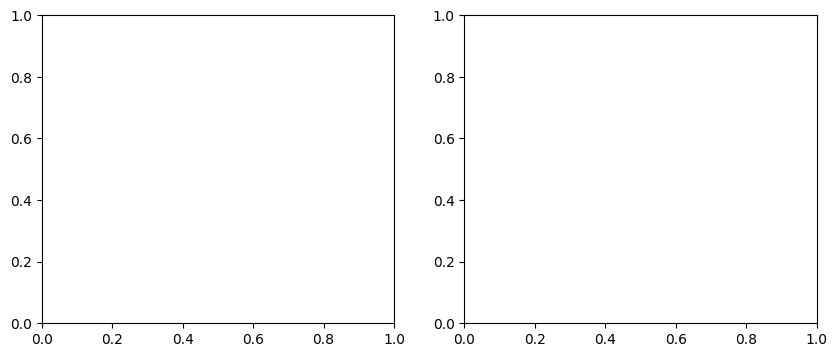

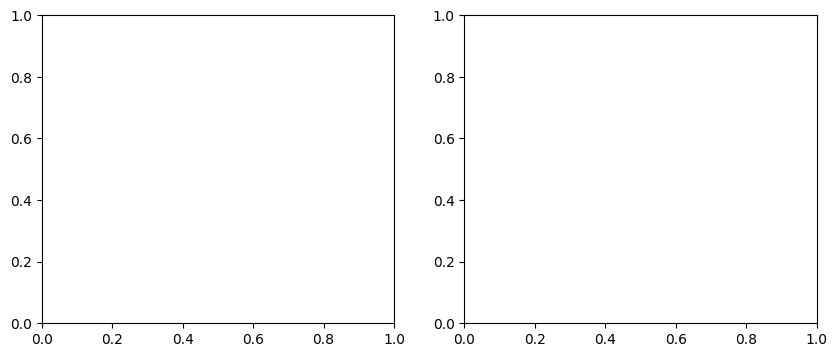

In [ ]:
# This can also be specified when creating subplots

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig

In [ ]:
# rcParams

In [ ]:
# A small subset of all the available plot settings (shuffling to get a good variation of options)

import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.titleweight',
 'boxplot.whiskerprops.linestyle',
 'date.autoformatter.day',
 'figure.constrained_layout.hspace',
 'figure.titlesize',
 'image.interpolation_stage',
 'keymap.copy',
 'legend.framealpha',
 'legend.handleheight',
 'lines.dash_joinstyle',
 'lines.markerfacecolor',
 'mathtext.default',
 'mathtext.fallback',
 'pdf.compression',
 'svg.fonttype',
 'text.usetex',
 'yaxis.labellocation',
 'ytick.major.size',
 'ytick.minor.visible']

In [ ]:
# We can check the current default figsize using rcParams

mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [ ]:
# We can also update this value to change the default (until the kernel is restarted)

mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [ ]:
# Use rcdefaults() to restore the defaults:

mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [ ]:
# This can also be done via pyplot

plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults()

Plotting with pandas

In [ ]:
# The plot() method is available on Series and DataFrame objects.
# Many of the parameters get passed down to matplotlib.
# The kind argument let's us vary the plot type

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')

In [ ]:
# Evolution over time

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

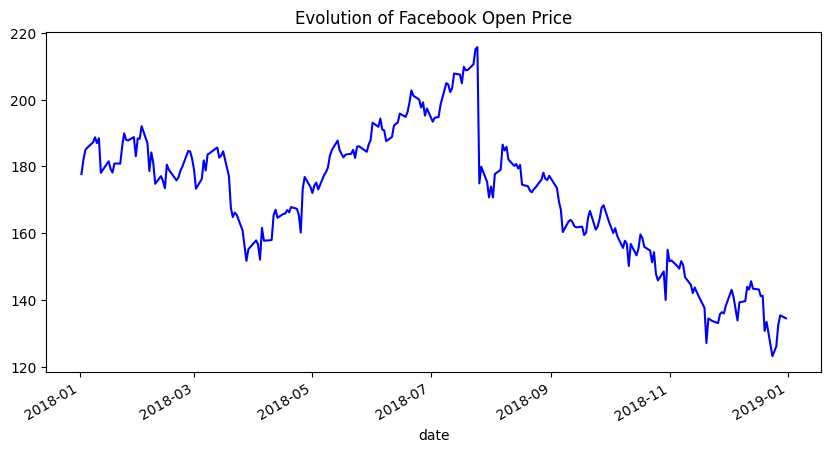

In [ ]:
# Line plots help us see how a variable changes over time.
# They are the default for the kind argument, but we can pass kind='line' to be explicit in our intent

fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='b-',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

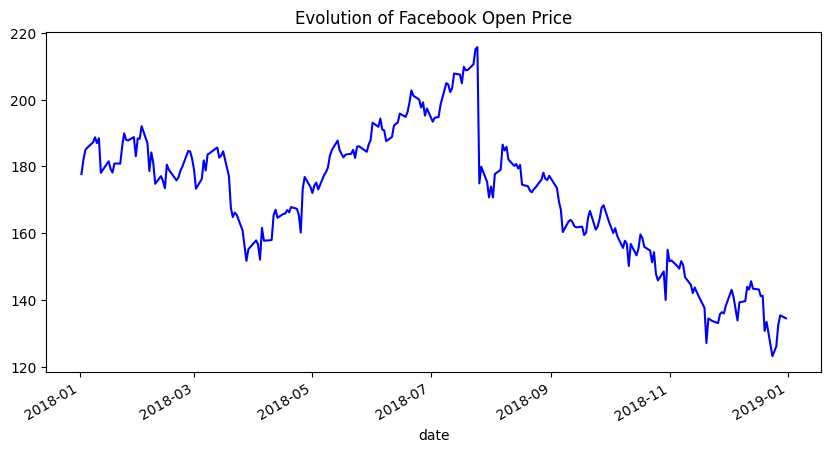

In [ ]:
# We provided the style argument in the previous example;
# however, we can use the color and linestyle arguments to get the same result

fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

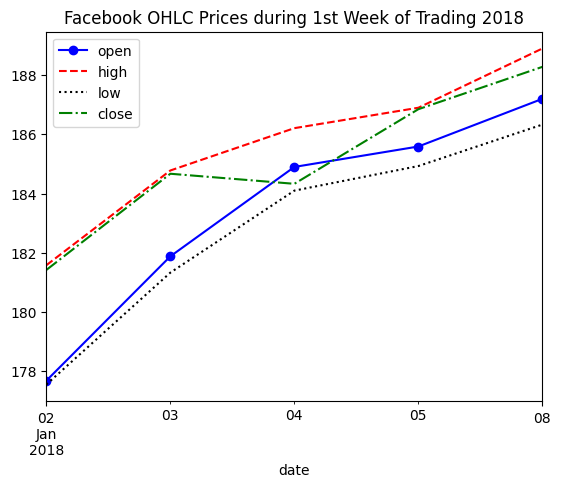

In [ ]:
# We can also plot many lines at once by simply passing a list of the columns to plot:

fb.iloc[:5,].plot(
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'r--', 'k:', 'g-.'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

In [ ]:
# Creating subplots

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

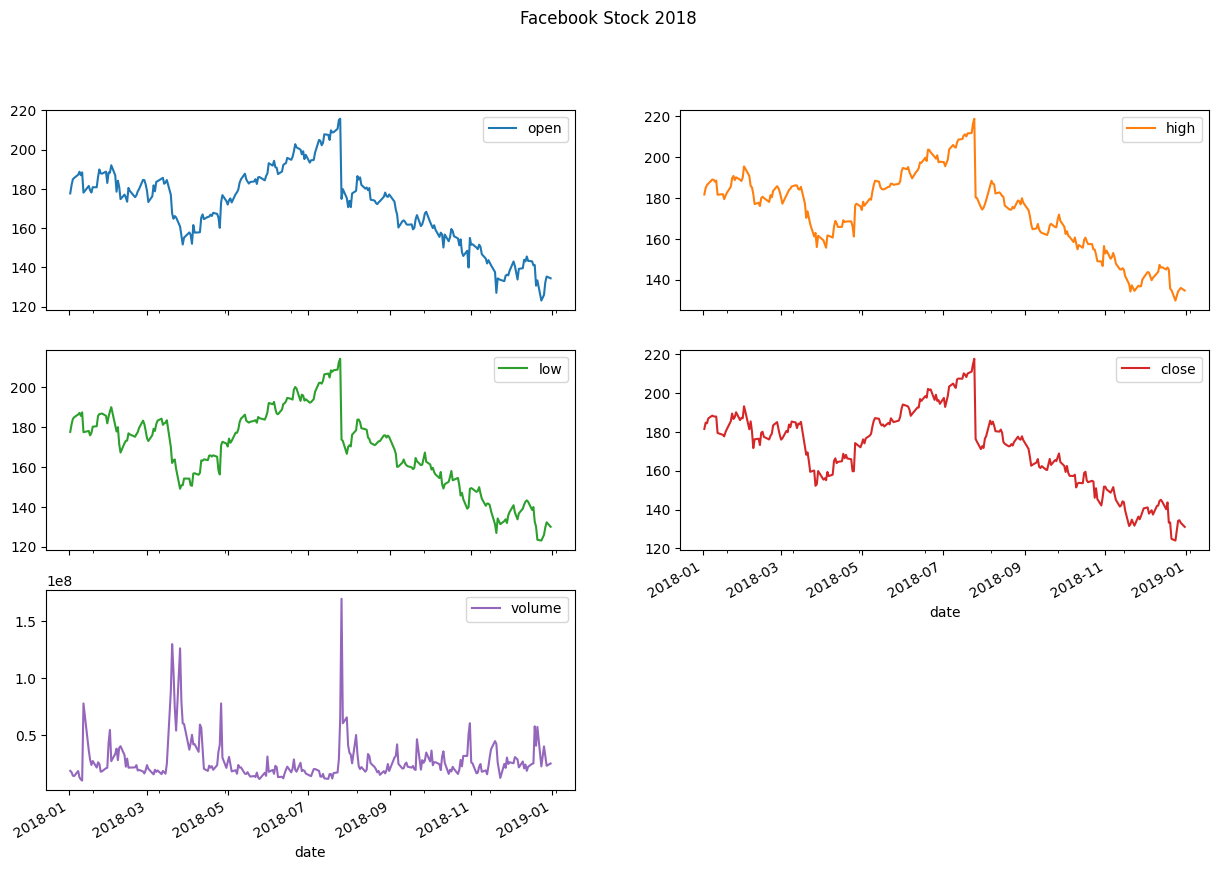

In [ ]:
# When plotting with pandas, creating subplots is simply a matter of passing subplots=True to the plot() method,
# and (optionally) specifying the layout in a tuple of (rows, columns)

fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(15,10),
    title='Facebook Stock 2018'
)

In [ ]:
# Scatter Plots

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

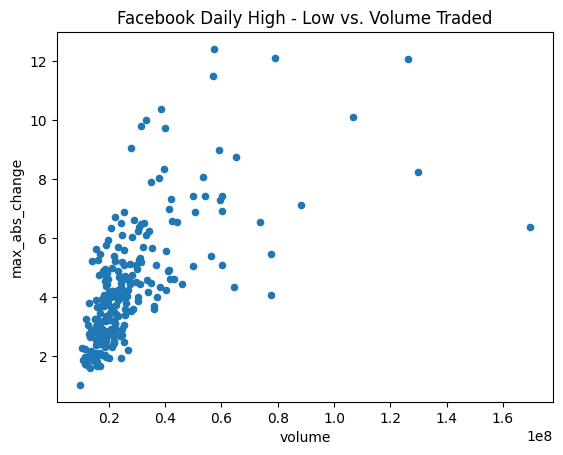

In [ ]:
# We make scatter plots to help visualize the relationship between two variables.
# Creating scatter plots requires we pass in kind='scatter' along with a column for the x-axis and a column for the y-axis

fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. Volume Traded'
)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

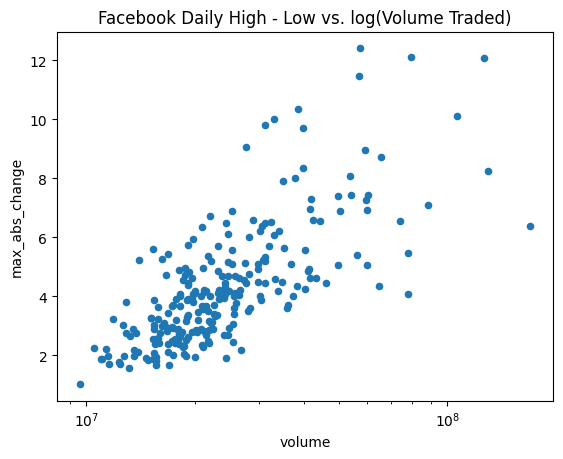

In [ ]:
# The relationship doesn't seem to be linear,
# but we can try a log transform on the x-axis since the scales of the axes are very different.
# With pandas, we simply pass in logx=True

fb.assign(
    max_abs_change=fb.high - fb.low
    ).plot(
        kind='scatter', x='volume', y='max_abs_change',
        title='Facebook Daily High - Low vs. log(Volume Traded)',
        logx=True
)

In [ ]:
# Note that With matplotlib, we could use plt.xscale('log') to do the same thing.

Adding Transparency to Plots with alpha

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

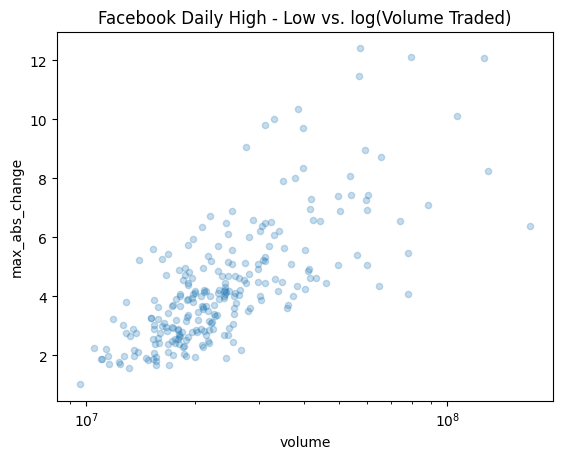

In [ ]:
# Sometimes our plots have many overlapping values, but this can be impossible to see.
# This can be addressed by increasing the transparency of what we are plotting using the alpha parameter.
# It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque.
# By default this is 1, so let's put in a lower value and re-plot the scatterplot

fb.assign(
    max_abs_change=fb.high - fb.low
    ).plot(
        kind='scatter', x='volume', y='max_abs_change',
        title='Facebook Daily High - Low vs. log(Volume Traded)',
        logx=True, alpha=0.25
)

In [ ]:
# Hexbins

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

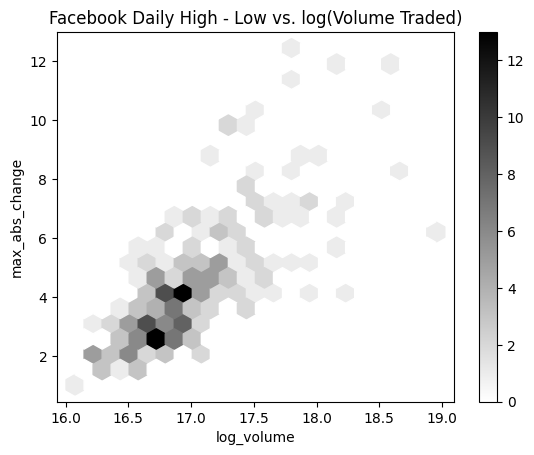

In [ ]:
# n the previous example, we can start to see the overlaps, but it is still difficult.
# Hexbins are another plot type that divide up the plot into hexagons,
# which are shaded according to the density of points there.
# With pandas, this is the hexbin value for the kind argument.
# It can also be important to tweak the gridsize , which determines the number of hexagons along the y-axis

fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20,
    sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)

In [ ]:
# Visualizing Correlations with Heatmaps

AttributeError: 'Colorbar' object has no attribute 'set_clim'

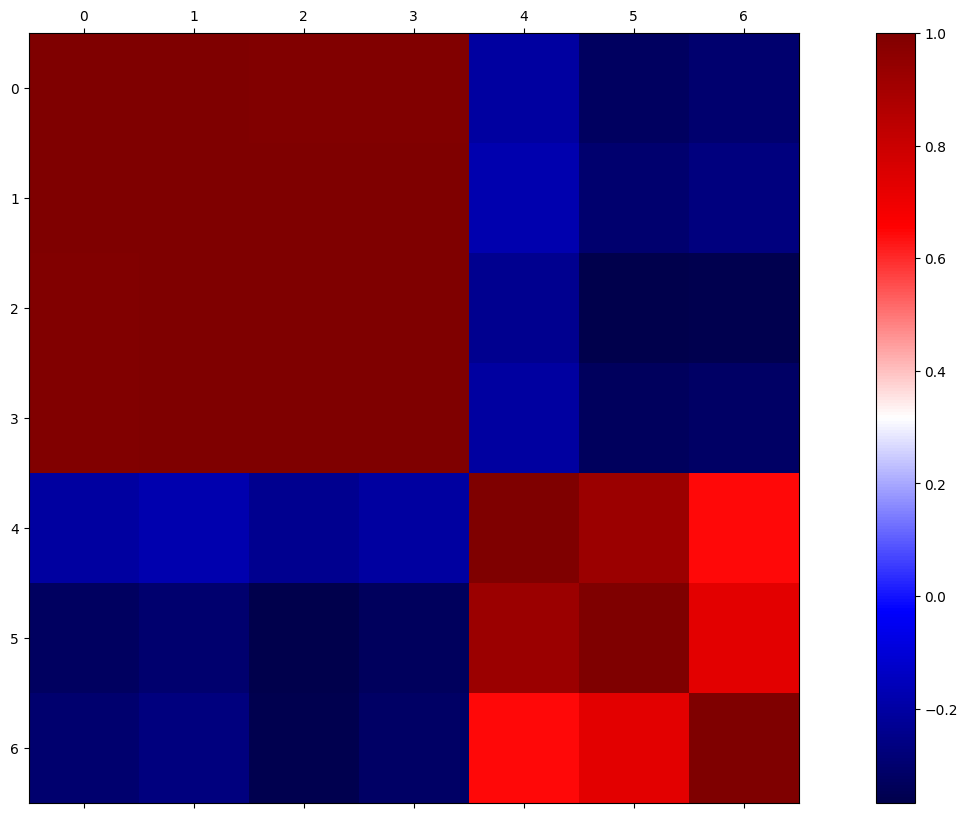

In [ ]:
# Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use matshow() from matplotlib

fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im).set_clim(-1, 1)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

In [ ]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

,max_abs_change
volume,0.642027
log_volume,0.731542


In [ ]:
# Visualizing distributions

In [ ]:
# Histograms

Text(0.5, 0, 'Volume traded')

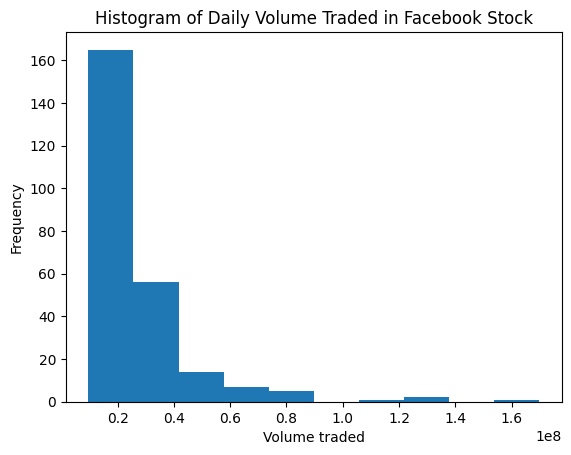

In [ ]:
# With the pandas plot() method, making histograms is as easy as passing in kind='hist'

fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'magnitude')

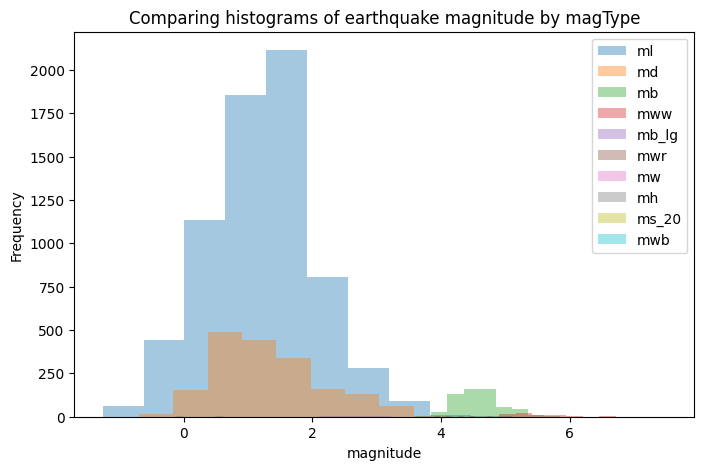

In [ ]:
# We can overlap histograms to compare distributions provided we use the alpha parameter.
# For example, let's compare the usage and magnitude of the various magTypes in the data

fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude')

In [ ]:
# Kernel Density Estimation (KDE)

Text(0.5, 0, 'Price ($)')

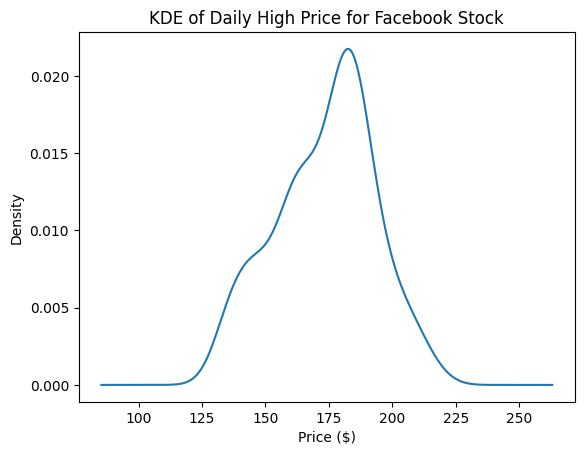

In [ ]:
# We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value

fb.high.plot(
    kind='kde',
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)')

In [ ]:
# Adding to the result of plot()

Text(0.5, 0, 'Price ($)')

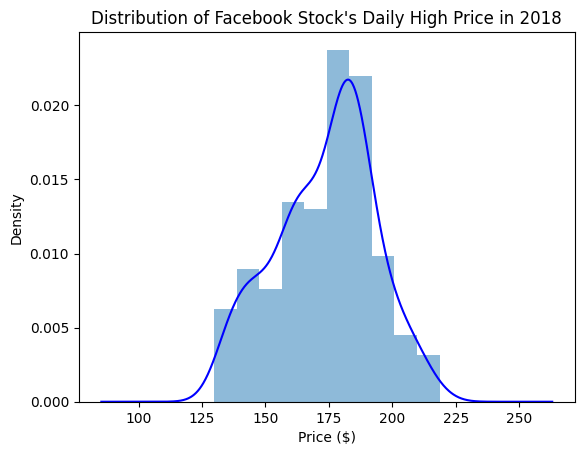

In [ ]:
# The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot,
# or we can pass this into another call to plot() as the ax argument to add to the original plot.
# It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy

ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)')

In [ ]:
# Plotting the ECDF

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

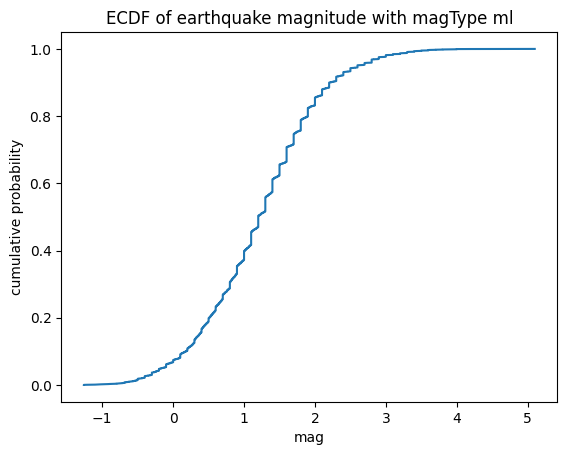

In [ ]:
# In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal),
# which we can see with the cumulative disribution function (CDF).
# Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF)

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

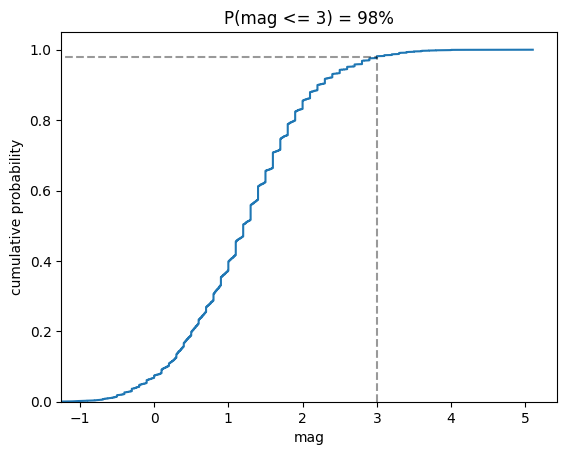

In [ ]:
# This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
    [3, 3], [0, .98], 'k--',
     [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')

In [ ]:
# Box plots

Text(0, 0.5, 'price ($)')

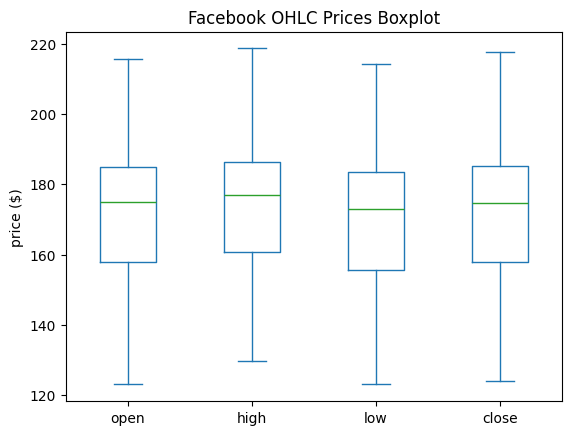

In [ ]:
# To make box plots with pandas, we pass kind='box' to the plot() method

fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)')

<ipython-input-75-1f11a50a217d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

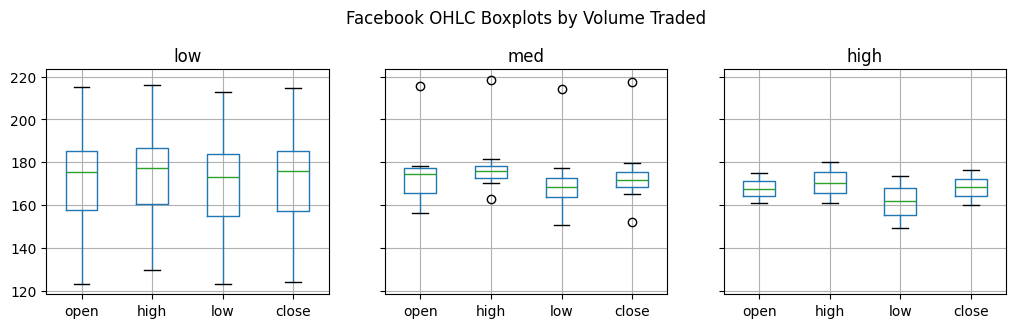

In [ ]:
# This can also be combined with a groupby()

fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

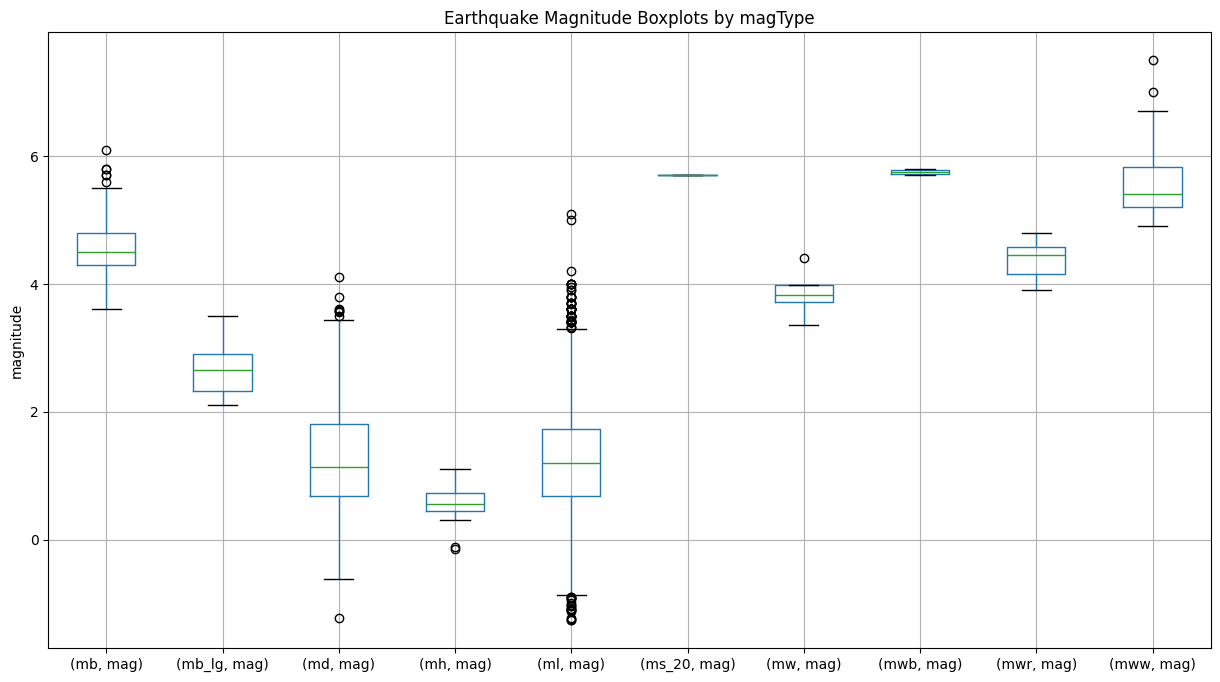

In [ ]:
# We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes

quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude')

In [ ]:
# Counts and frequencies

In [ ]:
# Bar charts

Text(0, 0.5, 'volume')

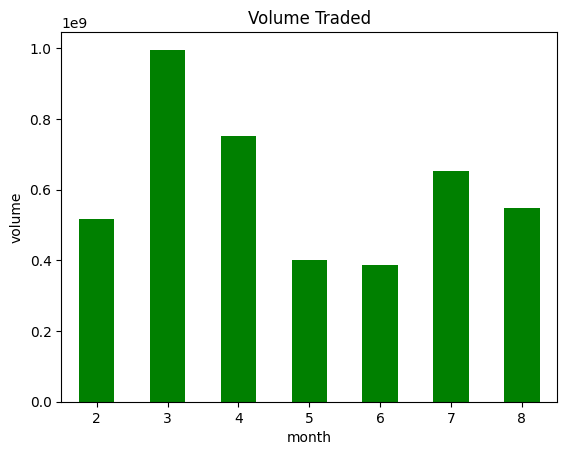

In [ ]:
# With pandas, we have the option of using the kind argument or using plot.<kind>().
# Let's use plot.bar() here to show the evolution of monthly volume traded in Facebook stock over time

fb['2018-02':'2018-08'].assign(
    month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
    color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume')

Text(0.5, 0, 'earthquakes')

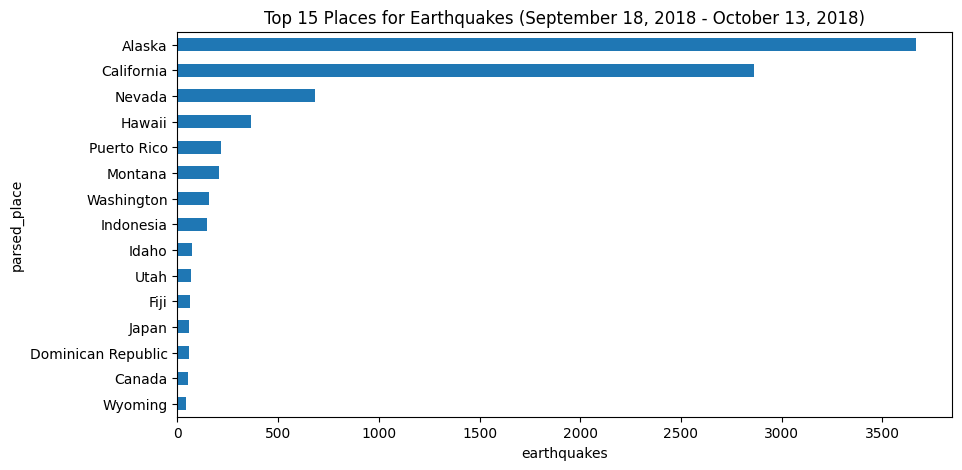

In [ ]:
# We can also change the orientation of the bars.
# Passing kind='barh' gives us horizontal bars instead of vertical ones.
# Let's use this to look at the top 15 places for earthquakes in our data

quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '\
    '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

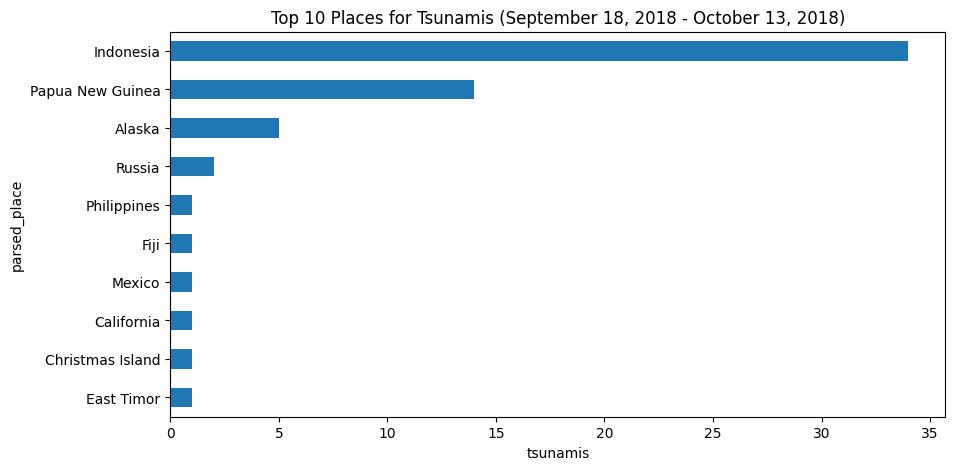

In [ ]:
# We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are

quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 10 Places for Tsunamis '\
    '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis')

Text(0, 0.5, 'count')

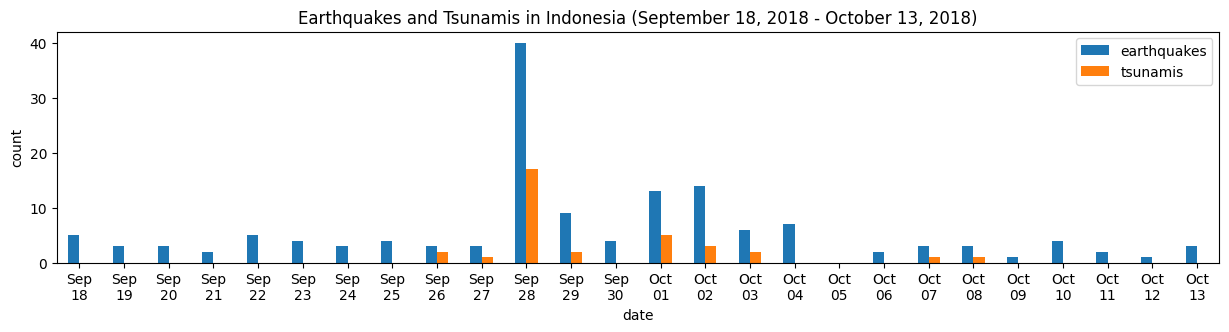

In [ ]:
# Seeing that Indonesia is the top place for tsunamis during the time period we are looking at,
# we may want to look how many earthquakes and tsunamis Indonesia gets on a daily basis.
# We could show this as a line plot or with bars; since this section is about bars, we will use bars here

indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
    label=['earthquakes', 'tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia '\
    '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'earthquakes')

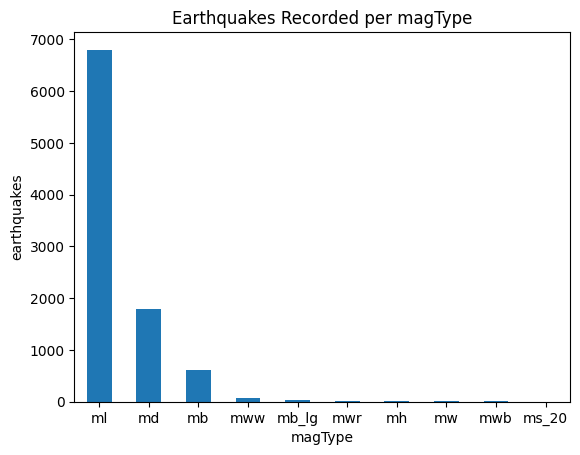

In [ ]:
# Using the kind arugment for vertical bars when the labels for each bar are shorter

quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

plt.xlabel('magType')
plt.ylabel('earthquakes')

Text(0, 0.5, 'earthquakes')

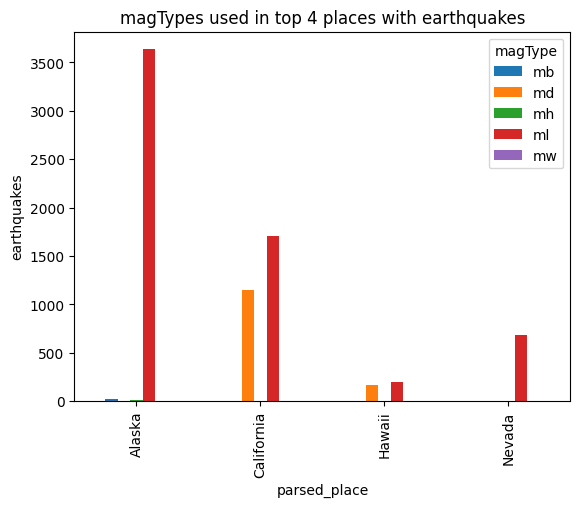

In [ ]:
# Top 4 places with earthquakes

quakes[
    quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
    title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes')

Text(0, 0.5, 'earthquakes')

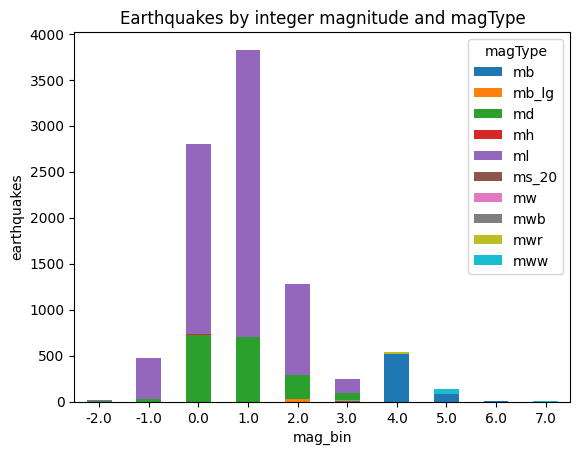

In [ ]:
# Stacked bar chart
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0,
    title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes')

In [ ]:
# Normalized stacked bars

Text(0, 0.5, 'percentage')

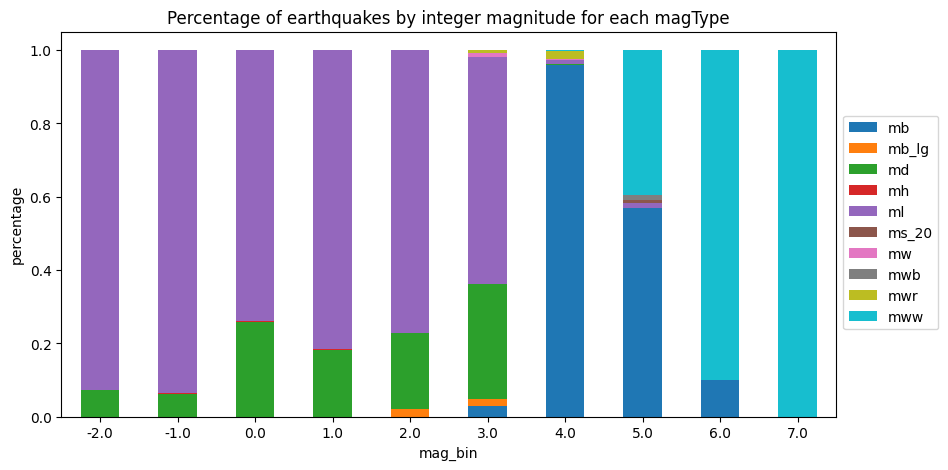

In [ ]:
# Plot the percentages to be better able to see the different magTypes

normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage')

In [ ]:
# pandas.plotting subpackage

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

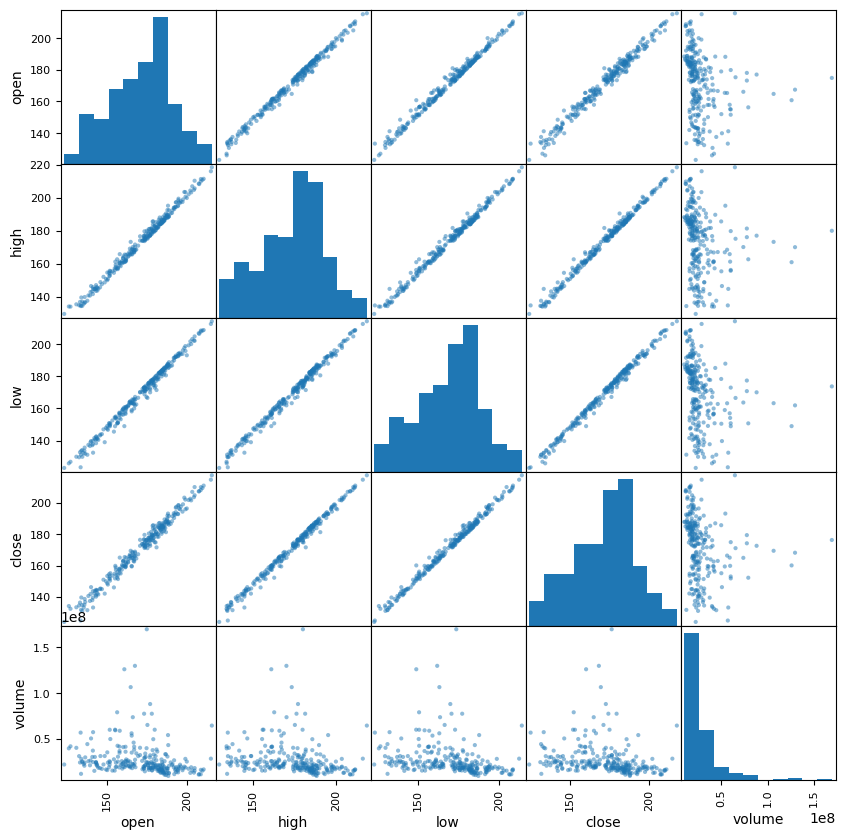

In [ ]:
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10));

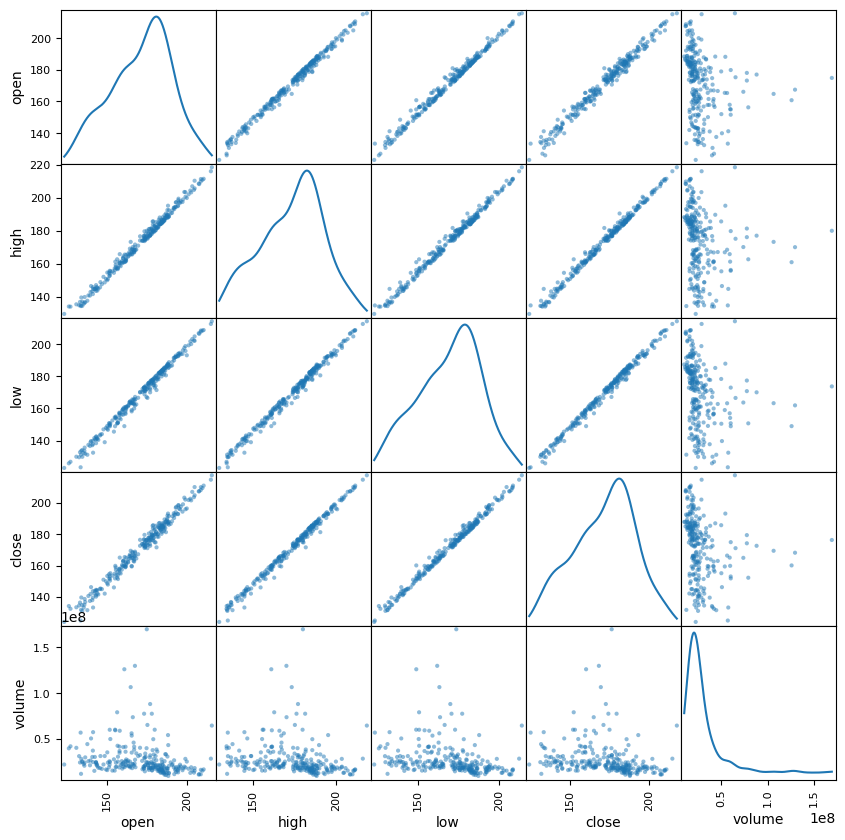

In [ ]:
# Changing the diagonal from histograms to KDE:

scatter_matrix(fb, figsize=(10, 10), diagonal='kde');

In [ ]:
# Lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

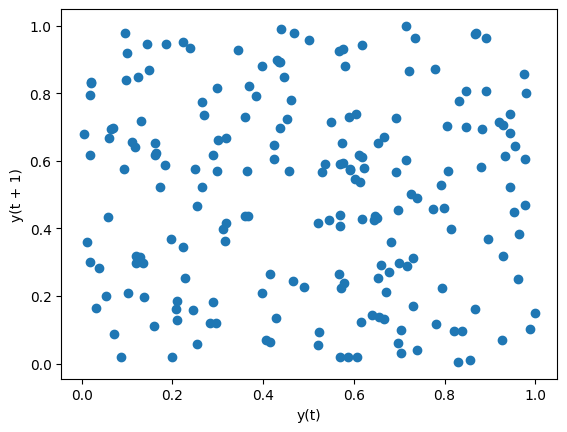

In [ ]:
# Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern


from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

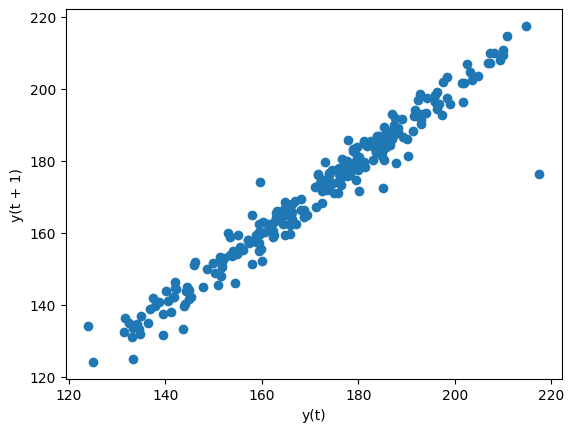

In [ ]:
# Data with some level of correlation to itself (autocorrelation) may have patterns.
# Stock prices are highly auto-correlated:

lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

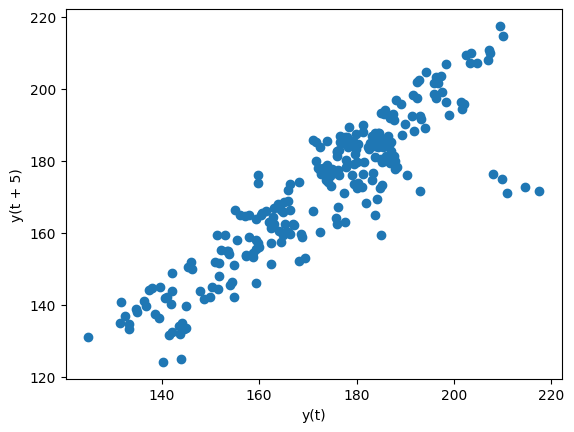

In [ ]:
# The default lag is 1, but we can alter this with the lag parameter.
# Let's look at a 5 day lag (a week of trading activity)

lag_plot(fb.close, lag=5)

In [ ]:
# Autocorrelation plots

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

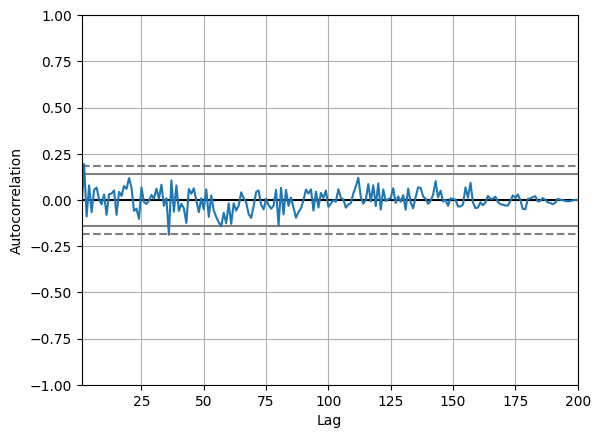

In [ ]:
# We can use the autocorrelation plot to see if this relationship may be meaningful or just noise.
# Random data will not have any significant autocorrelation (it stays within the bounds below

from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

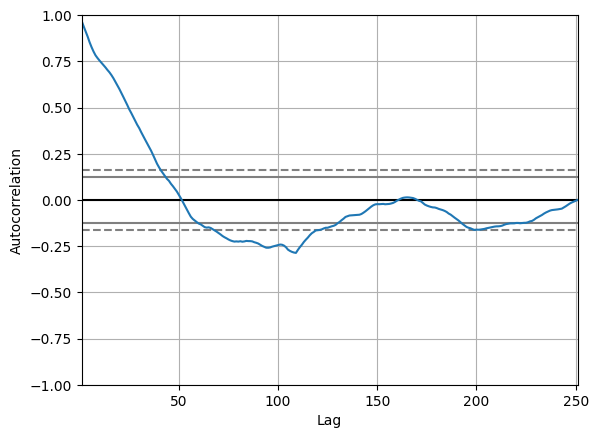

In [ ]:
# Stock data, on the other hand, does have significant autocorrelation:

autocorrelation_plot(fb.close)

In [ ]:
# Bootstrap plot

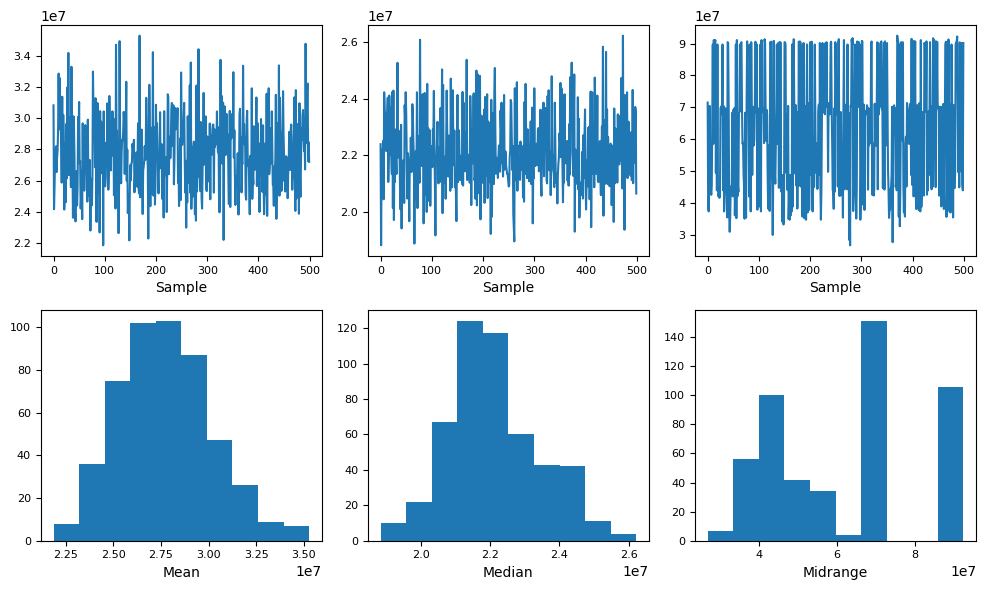

In [ ]:
# This plot helps us understand the uncertainty in our summary statistics

from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# Supplementary Activity

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

In [ ]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

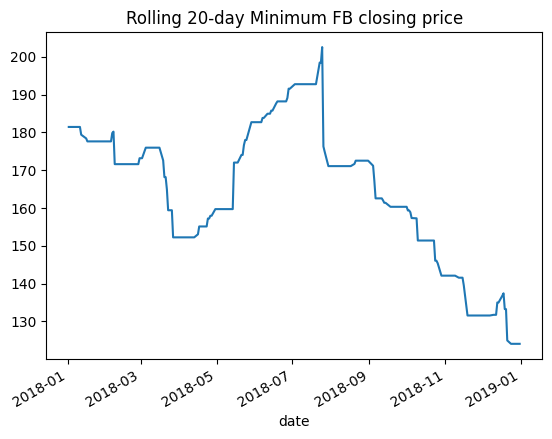

In [ ]:
fb.close.rolling('20D').min().plot(title = 'Rolling 20-day Minimum FB closing price');

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock

Text(0.5, 0, 'Price ($)')

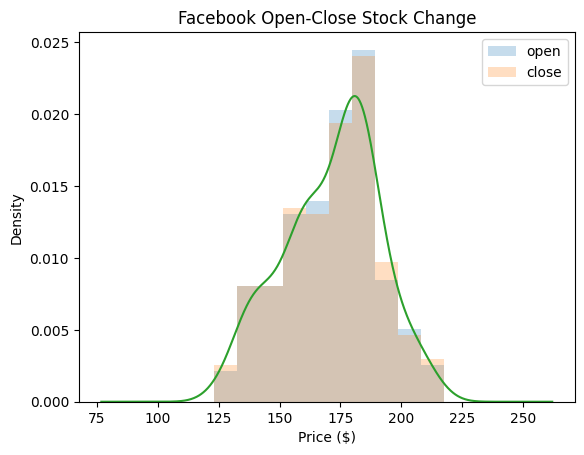

In [ ]:
fb.open.plot(
    ax=fb[['open', 'close']].plot(kind='hist', density = True, alpha=0.25),
    kind='kde',
    title = 'Facebook Open-Close Stock Change'
)
plt.xlabel('Price ($)')

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [ ]:
eq = pd.read_csv('earthquakes.csv') # Reading the earthquake data

Text(0, 0.5, 'magnitude')

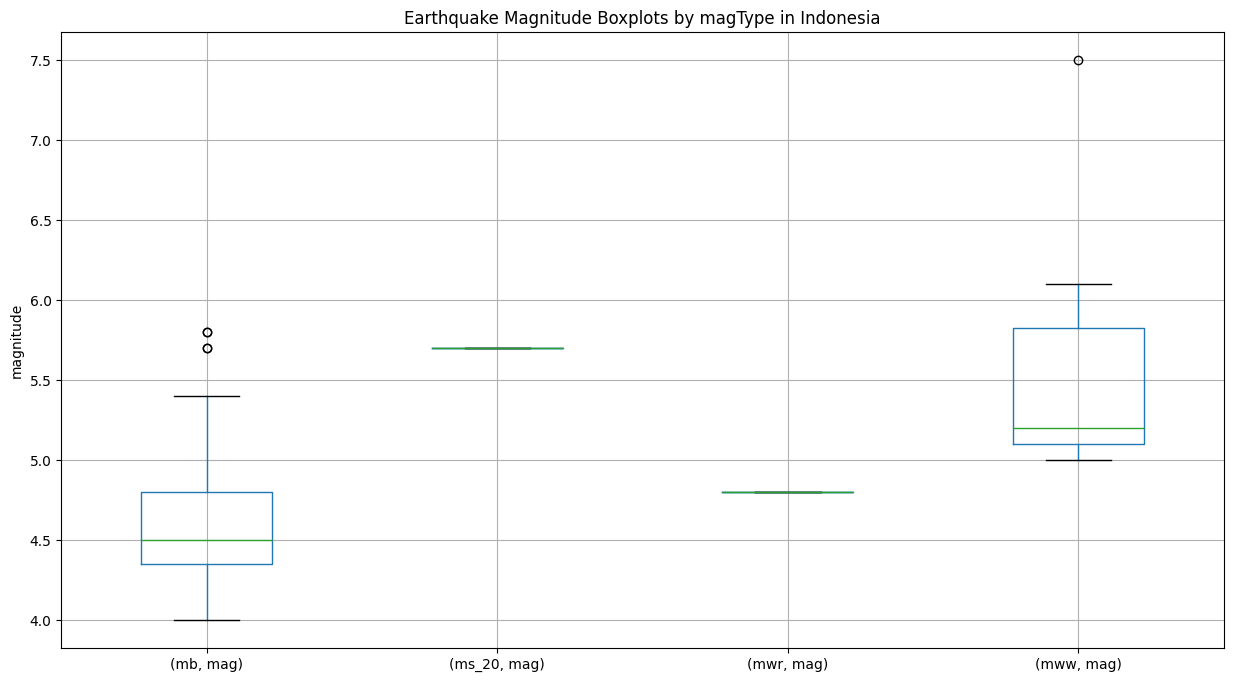

In [ ]:
# Used query to filter Indonesia
eq.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType in Indonesia')
plt.ylabel('magnitude')

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

<Axes: title={'center': 'Facebook Weekly high-low Stock Price Difference'}, xlabel='date'>

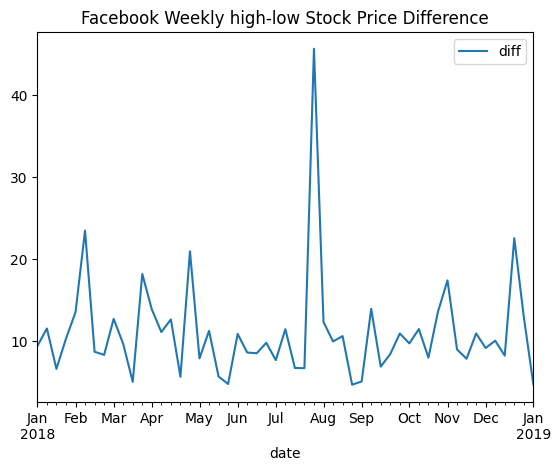

In [ ]:
# I will take only the high and low column and resample the data to weekly
# then use agg() as an aggregating method to specify the min and max
# Then I will create a new column for the difference
# Then drop the high and low so that the plot will only have 1 line

fb[['high','low']].resample('W').agg({
    'high': 'max', 
    'low': 'min'}).assign(diff = lambda x: x.high.sub(x.low)
                         ).drop(['high', 'low'], axis = 1
                               ).plot(title = 'Facebook Weekly high-low Stock Price Difference')

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
  * The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

  * The second subplot will be a bar plot showing the net effect this had monthly, using resample().

  * Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

  * Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

Text(0.5, 1.0, 'Facebook Monthly Open-Close Difference Stock Effect')

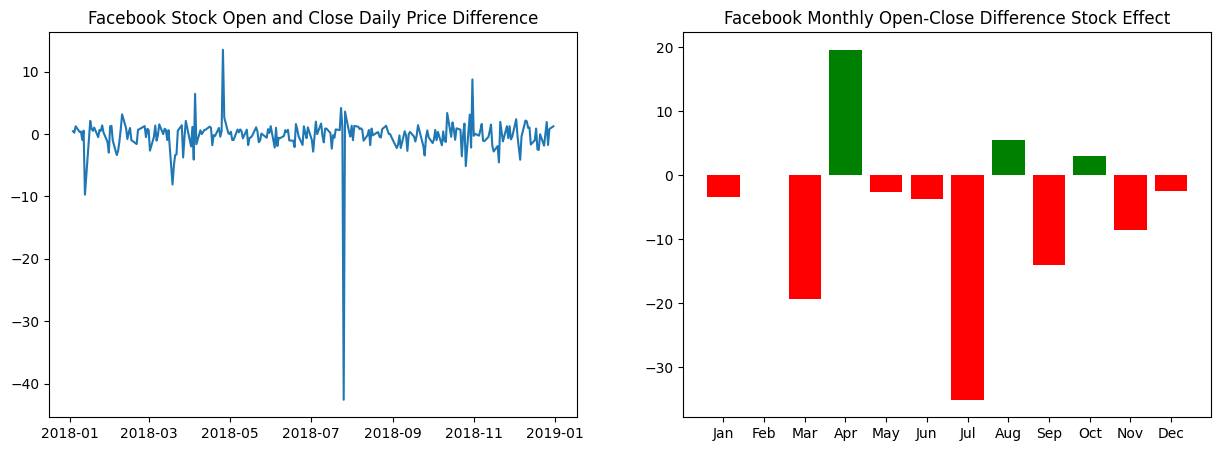

In [ ]:
diff = fb['diff'] = fb['open'].sub(fb.close.shift(1)) # For the difference between opening and prior closing
bar_month = diff.resample('ME').sum() # For monthly net effect
bar_color = ['green' if month >=0 else 'red' for month in bar_month] # For Bonus 1

fig, subs = plt.subplots(1,2, figsize = (15,5)) # Initiate the Subplots

#Subplot 1
subs[0].plot(diff)
subs[0].set_title('Facebook Stock Open and Close Daily Price Difference')

# Subplot 2
subs[1].bar(bar_month.index.strftime('%b'), bar_month, color = bar_color) #strftime('%b') for Bonus 2
subs[1].set_title('Facebook Monthly Open-Close Difference Stock Effect')

Summary / Conclusion

In this activity, I managed to relearn and recap about pandas and matplotlib uses and functions in visualizing dataframes. The one golden rule that I have always used is that we can use querying, merging, and aggregating of dataset and directly pass it as the plot values.